In [1]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pydicom 
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

def _resize_image(image, target):
    return cv2.resize(image, dsize=(target[0], target[1]), interpolation=cv2.INTER_LINEAR)
def load_scan(path):
    slices = [Image.open(path + '/' + s) for s in os.listdir(path)]
    return slices
def normalization(image):
    return (image - image.min())/(image.max() - image.min())

collection = os.listdir('./Data/test')

idx = 0
classes = 0
CTimages = np.zeros((864,256,256,3))
CTclasses = np.zeros(864)
for Cancer_classes in collection:
    if(Cancer_classes == '.DS_Store'):
        continue
    images = load_scan('./Data/test/'+ Cancer_classes)
    images = [np.array(i) for i in images]
    images = [cv2.resize(i,(256,256), interpolation=cv2.INTER_CUBIC) for i in images]
    print(len(images))
    for image in images:
        #print(image.shape)
        #plt.imshow(image[:,:,0:3])
        #plt.show()
        if(image.shape == (256,256)):
            #image = np.reshape(image,(256,256,1))
            continue
            #image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        CTimages[idx,:,:,:] = normalization(image[:,:,0:3])
        CTclasses[idx] = classes
        idx+=1
    classes+=1

CTimages = CTimages[0:idx]
CTclasses = CTclasses[0:idx]
print(CTimages.shape)
print(CTclasses.shape)
    

242
156
310
156
(861, 256, 256, 3)
(861,)


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(CTimages, CTclasses, test_size=0.2, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(688, 256, 256, 3)
(173, 256, 256, 3)
(688, 4)
(173, 4)


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input

base_model = InceptionV3(weights='imagenet',input_shape=(256,256,3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(
        X_train,y_train,
        batch_size=50,
        epochs=20,
        validation_data=(X_test, y_test))





Epoch 1/20
14/14 [==============================] - 29s 2s/step - loss: 2.7586 - accuracy: 0.3372 - val_loss: 1.4432 - val_accuracy: 0.3410
Epoch 2/20
14/14 [==============================] - 25s 2s/step - loss: 0.9396 - accuracy: 0.6105 - val_loss: 0.9773 - val_accuracy: 0.5723
Epoch 3/20
14/14 [==============================] - 26s 2s/step - loss: 0.7442 - accuracy: 0.7035 - val_loss: 0.8496 - val_accuracy: 0.6127
Epoch 4/20
14/14 [==============================] - 26s 2s/step - loss: 0.6547 - accuracy: 0.7297 - val_loss: 0.7889 - val_accuracy: 0.6243
Epoch 5/20
14/14 [==============================] - 24s 2s/step - loss: 0.5474 - accuracy: 0.7965 - val_loss: 0.7268 - val_accuracy: 0.6532
Epoch 6/20
14/14 [==============================] - 25s 2s/step - loss: 0.4851 - accuracy: 0.8314 - val_loss: 0.7117 - val_accuracy: 0.6994
Epoch 7/20
14/14 [==============================] - 29s 2s/step - loss: 0.4283 - accuracy: 0.8561 - val_loss: 0.6727 - val_accuracy: 0.7110
Epoch 8/20
14/14 [==

In [11]:
model.save('./model_Inception_trainablr.h5')

In [12]:
model = keras.models.load_model('./model_Inception_trainablr.h5')


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(
        X_train,y_train,
        batch_size=50,
        epochs=50,
        validation_data=(X_test, y_test))

from keras.models import load_model
model.save('./model_Inception_trainablr.h5')

Epoch 1/50
14/14 [==============================] - 136s 9s/step - loss: 0.1108 - accuracy: 0.9767 - val_loss: 7.2272 - val_accuracy: 0.7168
Epoch 2/50
14/14 [==============================] - 130s 9s/step - loss: 0.0278 - accuracy: 0.9942 - val_loss: 7.9314 - val_accuracy: 0.7457
Epoch 3/50
14/14 [==============================] - 130s 9s/step - loss: 0.0232 - accuracy: 0.9898 - val_loss: 2.9729 - val_accuracy: 0.8960
Epoch 4/50
14/14 [==============================] - 129s 9s/step - loss: 0.1090 - accuracy: 0.9753 - val_loss: 1.0473 - val_accuracy: 0.9249
Epoch 5/50
14/14 [==============================] - 119s 9s/step - loss: 0.0601 - accuracy: 0.9797 - val_loss: 7.3238 - val_accuracy: 0.8844
Epoch 6/50
14/14 [==============================] - 134s 10s/step - loss: 0.0171 - accuracy: 0.9956 - val_loss: 3.6784 - val_accuracy: 0.8613
Epoch 7/50
14/14 [==============================] - 146s 10s/step - loss: 0.0114 - accuracy: 0.9956 - val_loss: 2.3966 - val_accuracy: 0.8844
Epoch 8/50


In [20]:
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_564 (Conv2D)             (None, 127, 127, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_564 (BatchN (None, 127, 127, 32) 96          conv2d_564[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 127, 127, 32) 0           batch_normalization_564[0][0]    
____________________________________________________________________________________________

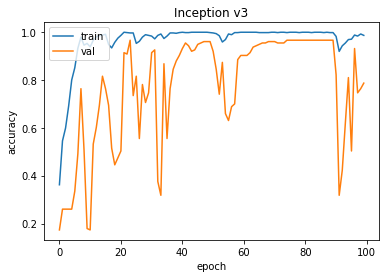

In [9]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception v3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('./images/V3.png',dpi=300)
plt.show()

In [10]:
import pandas as pd
rowindex = np.arange(0,150)
print(history.history['accuracy'][0])
df = pd.read_csv('./loss.csv')
for i in range(100):
    df.at[i,'V3t_t'] = history.history['accuracy'][i]
    df.at[i,'V3t_v'] = history.history['val_accuracy'][i]
df.to_csv('./loss.csv',index=False)

0.3619185984134674


In [22]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def normalization(image):
    return (image - image.min())/(image.max() - image.min())

def gray_to_redblue(image):
    R,G,B = image[:,:,0], image[:,:,1], image[:,:,2]
    #grey = sum(pixel) // len(pixel)
    redvalue = 1 - R  # "darkness"
    bluevalue = B  # "brightness"
    image[:,:,0] = B
    image[:,:,1] = 0
    image[:,:,2] = 1-R
    return image# + alpha


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_564 (Conv2D)             (None, 127, 127, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_564 (BatchN (None, 127, 127, 32) 96          conv2d_564[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 127, 127, 32) 0           batch_normalization_564[0][0]    
____________________________________________________________________________________________

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


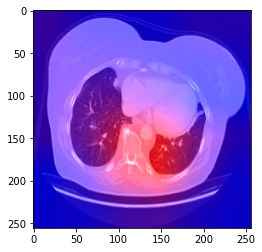

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


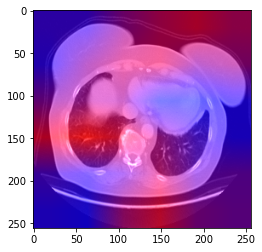

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


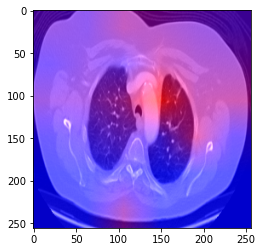

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


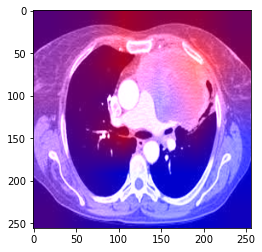

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


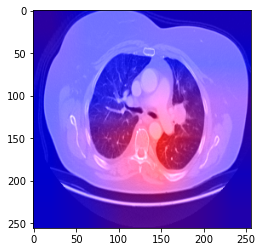

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


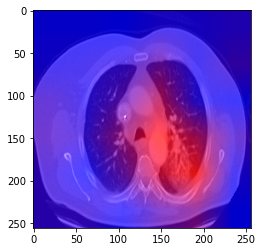

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


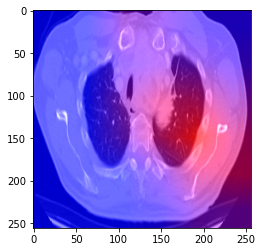

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


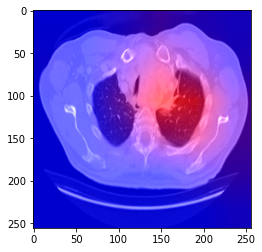

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


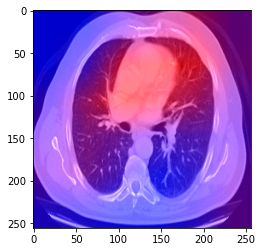

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


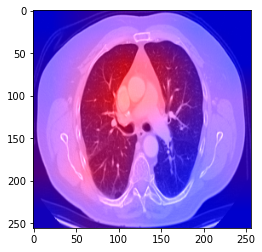

In [30]:
import cv2
from PIL import Image
from sklearn import preprocessing
import pylab

def generate_CAM(image,layer):
    img_array = np.reshape(image,(1,image.shape[0],image.shape[1],image.shape[2]))
    preds = model.predict(img_array)
    H5py_cam = make_gradcam_heatmap(img_array,model,layer)
    print(H5py_cam.shape)
    heatmap = cv2.resize(H5py_cam,(image.shape[0],image.shape[1]))
    print(img_array.shape)
    img_map = np.reshape(img_array,(image.shape[0],image.shape[1],image.shape[2]))
    heatmap = normalization(heatmap)
    img_map = normalization(img_map)
    heatmap = cv2.cvtColor(heatmap,cv2.COLOR_GRAY2RGB)
    #img_map = cv2.cvtColor(img_map,cv2.COLOR_GRAY2RGB)
    heatmap = gray_to_redblue(heatmap)
    #heatmap = cv2.cvtColor(heatmap,cv2.COLOR_GRAY2RGB)
    print(heatmap.shape)
    print(img_map.shape)
    combination = heatmap * 0.8 + img_map * 1

    plt.imshow(combination)
    plt.show()
    #pylab.imshow(img_map, cmap=pylab.cm.gray)  
    #pylab.show()
    #pylab.imshow(heatmap, cmap=pylab.cm.jet)  
    #pylab.show()

model = keras.models.load_model('./model_Inceptionv3.h5')
model.summary()
for i in range(10):
    generate_CAM(CTimages[i*50],'mixed10')
    

In [31]:
from sklearn.metrics import classification_report
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print(classification_report(np.argmax(y_test,1),
                      y_pred))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        45
           1       0.79      0.82      0.81        38
           2       0.81      0.73      0.77        60
           3       0.85      0.97      0.91        30

    accuracy                           0.83       173
   macro avg       0.83      0.85      0.84       173
weighted avg       0.83      0.83      0.82       173



In [34]:
def get_segmentation_model():
    
    class FixedDropout(tf.keras.layers.Dropout):
        def _get_noise_shape(self, inputs):
            if self.noise_shape is None:
                return self.noise_shape

            symbolic_shape = tf.keras.backend.shape(inputs)
            noise_shape = [symbolic_shape[axis] if shape is None else shape
                           for axis, shape in enumerate(self.noise_shape)]
            return tuple(noise_shape)

    def DiceCoef(y_trues, y_preds, smooth=1e-5, axis=None):
        intersection = tf.reduce_sum(y_trues * y_preds, axis=axis)
        union = tf.reduce_sum(y_trues, axis=axis) + tf.reduce_sum(y_preds, axis=axis)
        return tf.reduce_mean((2*intersection+smooth) / (union + smooth))

    def DiceLoss(y_trues, y_preds):
        return 1.0 - DiceCoef(y_trues, y_preds)

    get_custom_objects().update({'swish': tf.keras.layers.Activation(tf.nn.swish)})
    get_custom_objects().update({'FixedDropout':FixedDropout})
    get_custom_objects().update({'DiceCoef' : DiceCoef})
    get_custom_objects().update({'DiceLoss' : DiceLoss})
    
    print('Load segmentation model...')
    model = tf.keras.models.load_model('./lung-ct-segmentation-pretrain/osic_segmentation_model.h5')
    return model
    
    

In [35]:
model = get_segmentation_model()


Load segmentation model...


In [37]:
pred_masks = model.predict(CTimages, verbose=0)
pred_masks = (pred_masks>0.5).astype(np.float32)


In [38]:
import numpy as geek

CTimages_segmentation = geek.multiply(CTimages, pred_masks)


In [143]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(CTimages_segmentation, CTclasses, test_size=0.2, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(688, 256, 256, 3)
(173, 256, 256, 3)
(688, 4)
(173, 4)


In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input

base_model = InceptionV3(weights='imagenet',input_shape=(256,256,3), include_top=False)

for layer in base_model.layers:
    layer.trainable = True

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(
        X_train,y_train,
        batch_size=50,
        epochs=100,
        validation_data=(X_test, y_test))

from keras.models import load_model
model.save('model_Inceptionv3_pretrainedsegmentation.h5')



Epoch 1/100
14/14 [==============================] - 137s 9s/step - loss: 1.5288 - accuracy: 0.3619 - val_loss: 532597.9375 - val_accuracy: 0.1734
Epoch 2/100
14/14 [==============================] - 134s 10s/step - loss: 0.9788 - accuracy: 0.5451 - val_loss: 14498.9346 - val_accuracy: 0.2601
Epoch 3/100
14/14 [==============================] - 139s 10s/step - loss: 0.9568 - accuracy: 0.5988 - val_loss: 2078.4504 - val_accuracy: 0.2601
Epoch 4/100
14/14 [==============================] - 123s 9s/step - loss: 0.7009 - accuracy: 0.6904 - val_loss: 2981.9365 - val_accuracy: 0.2601
Epoch 5/100
14/14 [==============================] - 119s 9s/step - loss: 0.5216 - accuracy: 0.7994 - val_loss: 164.2257 - val_accuracy: 0.2601
Epoch 6/100
14/14 [==============================] - 120s 9s/step - loss: 0.4061 - accuracy: 0.8503 - val_loss: 6.6836 - val_accuracy: 0.3353
Epoch 7/100
14/14 [==============================] - 121s 9s/step - loss: 0.2031 - accuracy: 0.9317 - val_loss: 4.9973 - val_accu

In [4]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception v3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Training Inception v3')
plt.show()

NameError: name 'history' is not defined

In [42]:
from sklearn.metrics import classification_report
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print(classification_report(np.argmax(y_test,1),y_pred))


              precision    recall  f1-score   support

           0       0.73      0.82      0.77        45
           1       0.96      0.71      0.82        38
           2       0.77      0.83      0.80        60
           3       1.00      0.97      0.98        30

    accuracy                           0.83       173
   macro avg       0.86      0.83      0.84       173
weighted avg       0.84      0.83      0.83       173



In [44]:
model.summary()

Model: "model_55"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_846 (Conv2D)             (None, 127, 127, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_846 (BatchN (None, 127, 127, 32) 96          conv2d_846[0][0]                 
__________________________________________________________________________________________________
activation_847 (Activation)     (None, 127, 127, 32) 0           batch_normalization_846[0][0]    
___________________________________________________________________________________________

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


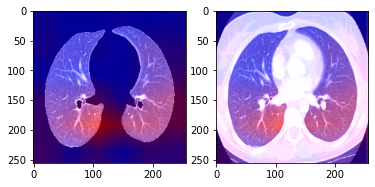

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


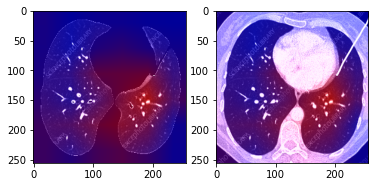

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


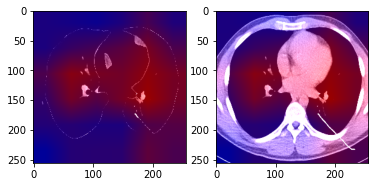

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


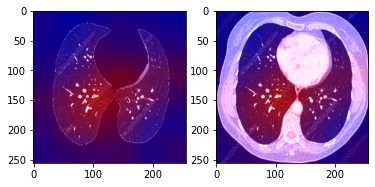

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


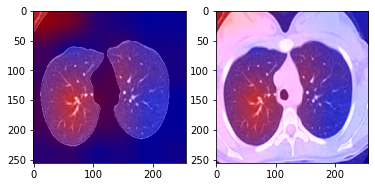

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


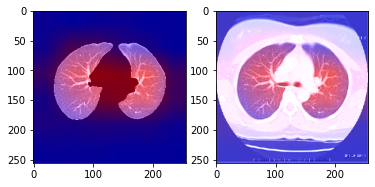

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


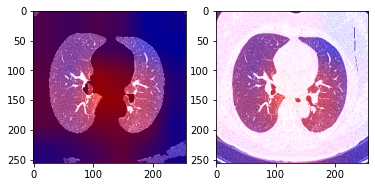

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


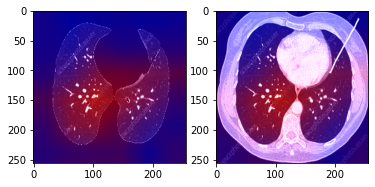

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


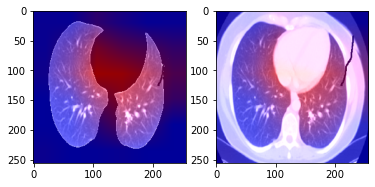

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 6)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


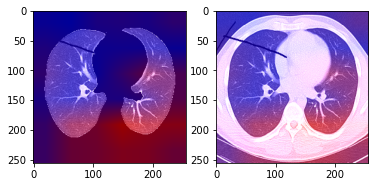

In [49]:
import cv2
from PIL import Image
from sklearn import preprocessing
import pylab

def generate_CAM_originalimage(image,original_image,layer):
    img_array = np.reshape(image,(1,image.shape[0],image.shape[1],image.shape[2]))
    preds = model.predict(img_array)
    H5py_cam = make_gradcam_heatmap(img_array,model,layer)
    print(H5py_cam.shape)
    heatmap = cv2.resize(H5py_cam,(image.shape[0],image.shape[1]))
    print(img_array.shape)
    img_map = np.reshape(img_array,(image.shape[0],image.shape[1],image.shape[2]))
    heatmap = normalization(heatmap)
    img_map = normalization(img_map)
    heatmap = cv2.cvtColor(heatmap,cv2.COLOR_GRAY2RGB)
    #img_map = cv2.cvtColor(img_map,cv2.COLOR_GRAY2RGB)
    heatmap = gray_to_redblue(heatmap)
    #heatmap = cv2.cvtColor(heatmap,cv2.COLOR_GRAY2RGB)
    print(heatmap.shape)
    print(img_map.shape)
    combination = heatmap * 0.6 + img_map * 1
    combination2 = heatmap * 0.6 + original_image * 1

    fig,ax = plt.subplots(1,2)
    ax[0].imshow(combination)
    ax[1].imshow(combination2)
    plt.show() 
    
for i in range(10):
    generate_CAM_originalimage(CTimages_segmentation[i+800],CTimages[i+800],'mixed10')
    

In [128]:
CT_threshold = CTimages

indices = CT_threshold > 0.6
CT_threshold[indices]=0.6

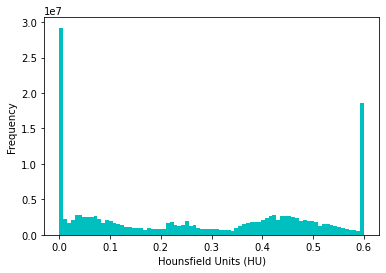

In [129]:
plt.hist(CTimages.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

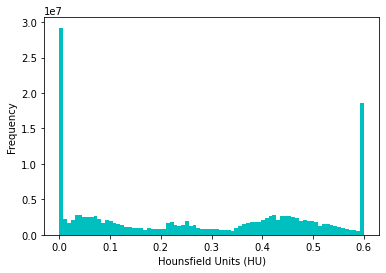

In [130]:
plt.hist(CT_threshold.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

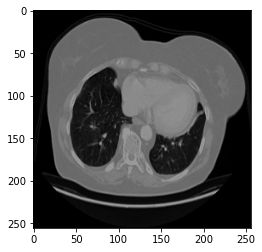

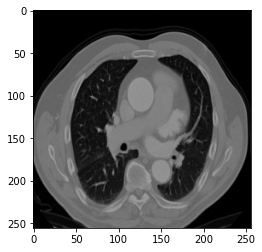

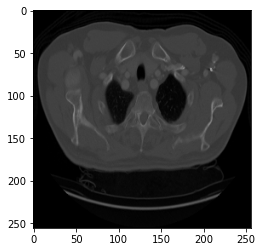

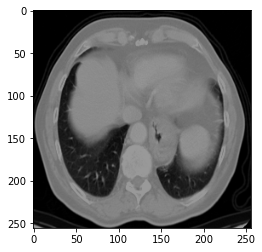

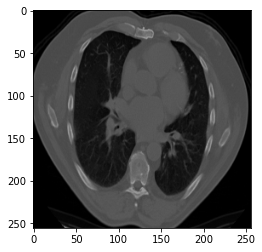

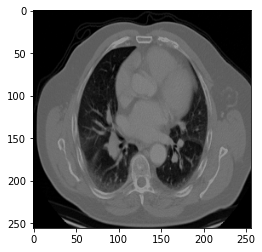

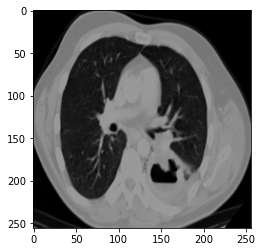

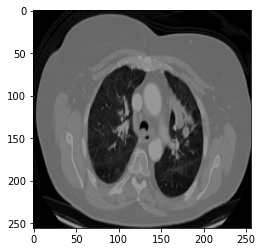

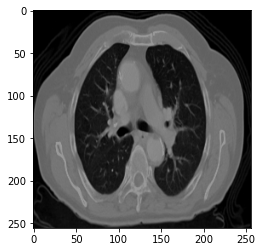

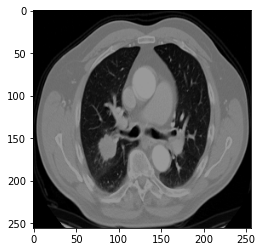

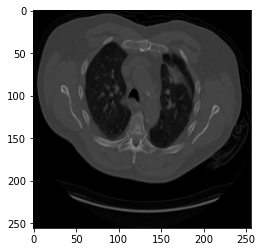

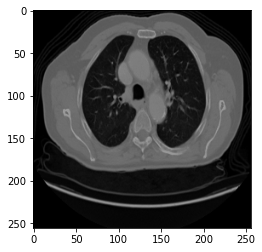

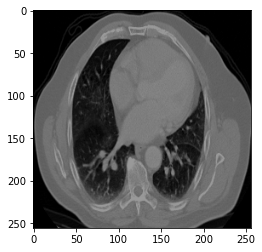

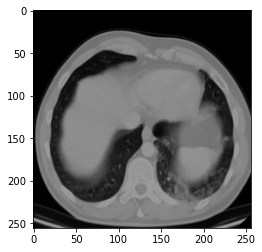

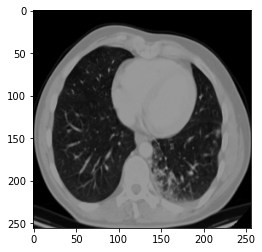

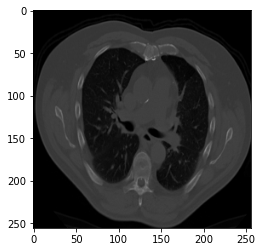

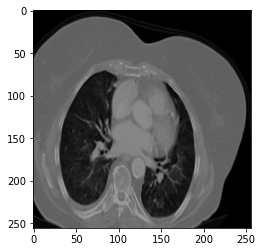

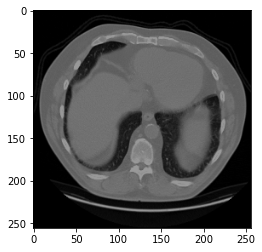

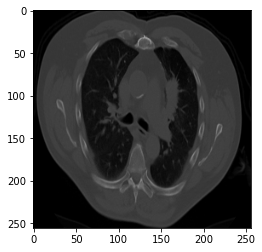

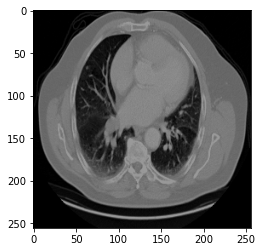

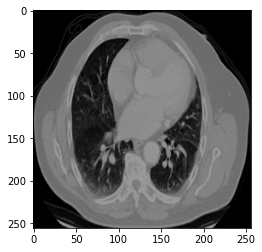

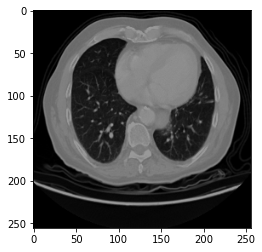

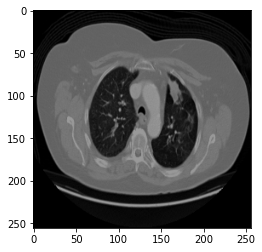

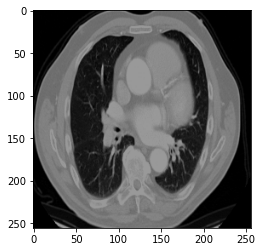

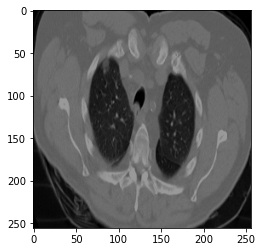

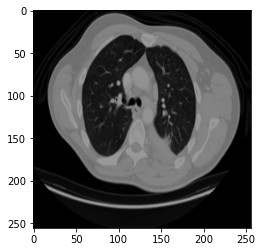

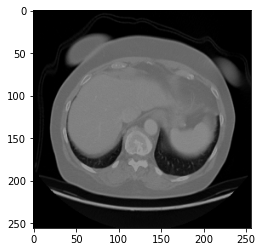

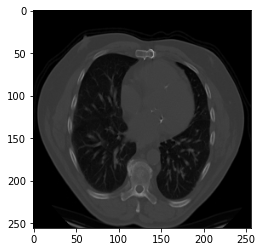

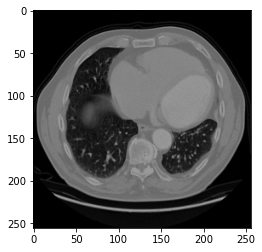

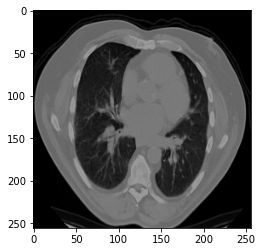

(861, 256, 256, 3)


In [131]:
CT_threshold = CT_threshold.astype('float32')
for i in range(30):
    plt.imshow(CT_threshold[i,:,:])
    plt.show()
print(CT_threshold.shape)

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(CT_threshold, CTclasses, test_size=0.2, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



NameError: name 'CT_threshold' is not defined

In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, UpSampling2D, Conv2DTranspose, BatchNormalization
import tensorflow as tf

base_model = InceptionV3(weights='imagenet',input_shape=(256,256,3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Conv2DTranspose(2048, 3, padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D(2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(
        X_train,y_train,
        batch_size=50,
        epochs=50,
        validation_data=(X_test, y_test))

from keras.models import load_model
model.save('model_Inceptionv3_threshold.h5')



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 127, 127, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 127, 127, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 127, 127, 32) 0           batch_normalization_283[0][0]    
______________________________________________________________________________________________

NameError: name 'keras' is not defined

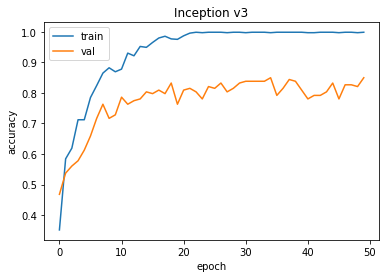

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        45
           1       0.85      0.87      0.86        38
           2       0.86      0.80      0.83        60
           3       1.00      0.97      0.98        30

    accuracy                           0.85       173
   macro avg       0.86      0.86      0.86       173
weighted avg       0.85      0.85      0.85       173



In [146]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception v3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

from sklearn.metrics import classification_report
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print(classification_report(np.argmax(y_test,1),
                      y_pred))

In [137]:
Val = np.zeros((4,50))
Acc = np.zeros((4,50))

In [148]:
Val[0] = history.history['val_accuracy']
Acc[0] = history.history['accuracy']

In [ ]:
from matplotlib import pyplot as plt

def plotCollection(ax, xs, ys, *args, **kwargs):

  ax.plot(xs,ys, *args, **kwargs)

  if "label" in kwargs.keys():

    #remove duplicates
    handles, labels = pyplot.gca().get_legend_handles_labels()
    newLabels, newHandles = [], []
    for handle, label in zip(handles, labels):
      if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)

fig = plt.figure()
ax = fig.add_subplot('111')

plotCollection(ax, a)

n1 = ax.plot(Acc[0],color='b', label = "no")
n2 = ax.plot(Val[0],color='b', label = "no")
T11 = ax.plot(Acc[1])
T12 = ax.plot(Val[1])
T21 = ax.plot(Acc[2],color='r', label = "2")
T22 = ax.plot(Val[2],color='r', label = "2")
M1 = ax.plot(Acc[3])
M2 = ax.plot(Val[3])
ax.set_title('Inception v3')
ax.ylabel('accuracy')
ax.xlabel('epoch')
ax.legend(['Threshold I','Threshold II'], loc='lower right')
plt.show()


In [2]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def normalization(image):
    return (image - image.min())/(image.max() - image.min())

def gray_to_redblue(image):
    R,G,B = image[:,:,0], image[:,:,1], image[:,:,2]
    #grey = sum(pixel) // len(pixel)
    redvalue = 1 - R  # "darkness"
    bluevalue = B  # "brightness"
    image[:,:,0] = B
    image[:,:,1] = 0
    image[:,:,2] = 1-R
    return image# + alpha

In [3]:
import cv2
from PIL import Image
from sklearn import preprocessing
import pylab
from tensorflow import keras
import numpy as np

def generate_CAM(image,layer):
    img_array = np.reshape(image,(1,image.shape[0],image.shape[1],image.shape[2]))
    preds = model.predict(img_array)
    H5py_cam = make_gradcam_heatmap(img_array,model,layer)
    print(H5py_cam.shape)
    heatmap = cv2.resize(H5py_cam,(image.shape[0],image.shape[1]))
    print(img_array.shape)
    img_map = np.reshape(img_array,(image.shape[0],image.shape[1],image.shape[2]))
    heatmap = normalization(heatmap)
    img_map = normalization(img_map)
    heatmap = cv2.cvtColor(heatmap,cv2.COLOR_GRAY2RGB)
    #img_map = cv2.cvtColor(img_map,cv2.COLOR_GRAY2RGB)
    heatmap = gray_to_redblue(heatmap)
    #heatmap = cv2.cvtColor(heatmap,cv2.COLOR_GRAY2RGB)
    print(heatmap.shape)
    print(img_map.shape)
    combination = heatmap * 0.8 + img_map * 1

    plt.imshow(combination)
    plt.show()
    
    return heatmap



In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, UpSampling2D, Conv2DTranspose, BatchNormalization
import tensorflow as tf

base_model = InceptionV3(weights='imagenet',input_shape=(256,256,3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
attention = (x)
x = Conv2DTranspose(2048, 3, padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D(2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)


model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

model.summary()


'''model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(
        X_train,y_train,
        batch_size=50,
        epochs=50,
        validation_data=(X_test, y_test))
'''
from keras.models import load_model
model.save('model_Inceptionv3_self_attention.h5')



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________